# 0. Setup

### Import packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading data

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products = pd.read_csv('order_products__prior.csv')

In [3]:
dataset = {'aisles' : aisles, 'departments' : departments, 'orders' : orders, 'products' : products, 'order_products' : order_products}

# 1. Exploratory analysis

Datasets : An anonymized dataset containing a sample of over 3 million grocery orders from more than 200 000 instacart users, published in 2017. Between 4 and 100 of orders are provided per user, with sequence of products purchased in each order.  

In [4]:
# Overview
df_shapes = pd.DataFrame(columns = ['Dataset', 'Row count', 'Col count','Total null count'])
for n, d in dataset.items():
    df_shapes.loc[len(df_shapes)] = [n, d.shape[0], d.shape[1], d.isna().sum().sum()]
df_shapes

,Dataset,Row count,Col count,Total null count
0,aisles,134,2,0
1,departments,21,2,0
2,orders,3421083,7,206209
3,products,49688,4,0
4,order_products,32434489,4,0


### `aisles` table

Columns
- aisle_id : unique id
- aisle

In [5]:
# A look at the aisle table
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### `departments` table

Columns
- department_id : unique id
- department

In [6]:
# A look at the departments table
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### `orders` table

Columns
- order_id : unique id
- user_id
- eval_set : divided the data into 'prior', 'eval', 'train'. Only the last order of a user is categorized as 'eval' or 'train'. 
- order_number : order number of the user
- order_dow : day of week
- order_hour_of_day
- days_since_prior_order


In [7]:
# A look at the orders table
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
# Examine statistics of numerical columns
pd.options.display.float_format = '{:.0f}'.format
orders.drop(columns=['order_id','user_id']).describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083,3421083,3421083,3214874
mean,17,3,13,11
std,18,2,4,9
min,1,0,0,0
25%,5,1,10,4
50%,11,3,13,7
75%,23,5,16,15
max,100,6,23,30


In [9]:
# Identify number of null values
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [10]:
# Verify if null values in days_since_prior_order are due to first purchases per person
orders.isna().sum().sum() == len(orders.user_id.unique())

True

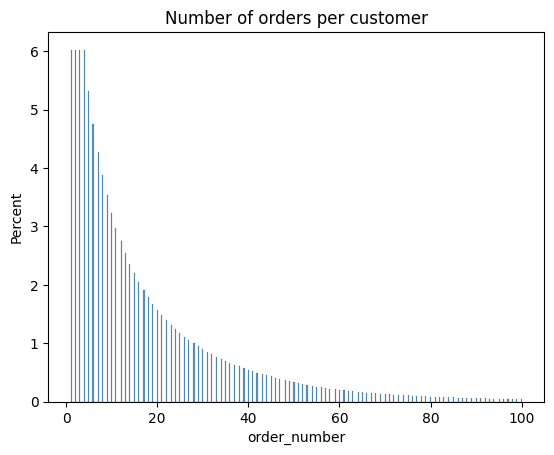

In [11]:
# Display order numbers per customer

fig = plt.figure()

sns.histplot(data = orders,
             x = 'order_number',
             stat = 'percent')
plt.title('Number of orders per customer') ;

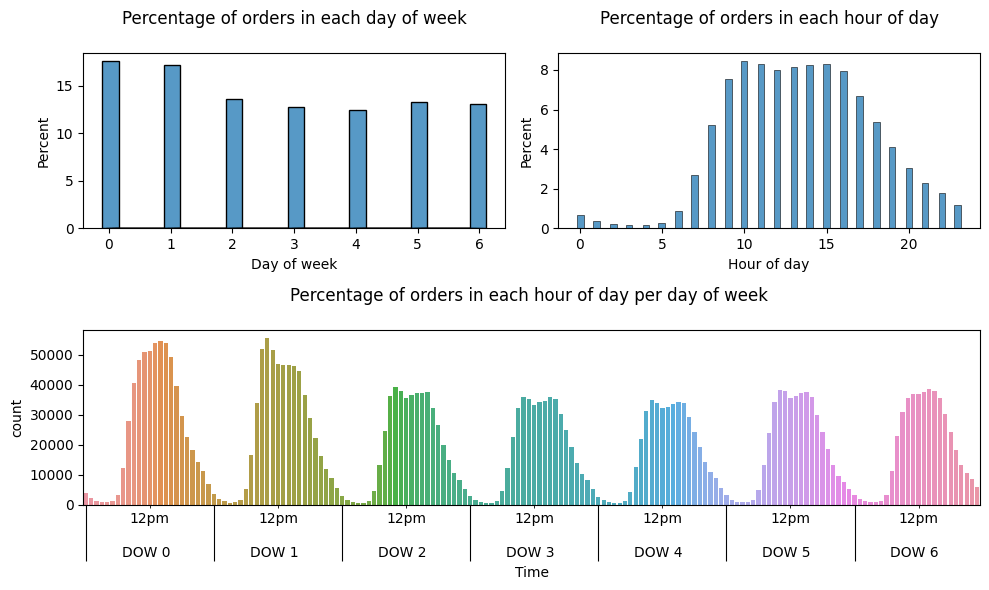

In [12]:
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

fig = plt.figure(figsize=(10,6))

# ax1 : Percentage of orders in each day of week
ax1 = fig.add_subplot(2,2,1)
sns.histplot(data= orders,
             x = 'order_dow',
             shrink = 5,
             stat = 'percent',
             ax = ax1)
ax1.set_title('Percentage of orders in each day of week\n')
ax1.set_xlabel('Day of week')

# ax2 : Percentage of orders in each hour of day
ax2 = fig.add_subplot(2,2,2)
sns.histplot(data= orders,
             x = 'order_hour_of_day',
             shrink = 5,
             stat = 'percent',
             ax = ax2)
ax2.set_title('Percentage of orders in each hour of day\n')
ax2.set_xlabel('Hour of day')

#ax3 : Percentage of orders in each hour of day per day of week

order_grouped = orders.groupby(['order_dow','order_hour_of_day']).count()['order_id'].reset_index(name = 'count')

ax3 = fig.add_subplot(2,1,2)
sns.barplot(data = order_grouped,
             y= 'count',
             x = order_grouped.index,
             ax = ax3)


ax3.xaxis.set_minor_locator(ticker.MultipleLocator(12))
ax3.xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, pos: f'12pm' if x % 6 == 0 else ''))

ax3.xaxis.set_major_locator(ticker.MultipleLocator(24))
ax3.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'DOW {int(x/24)}'))
ax3.xaxis.set_tick_params(which='major', pad=-10, length=40)

offset = ScaledTranslation(0.6, 0, fig.dpi_scale_trans)
for label in ax3.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

ax3.set_title('Percentage of orders in each hour of day per day of week \n')
ax3.set_xlabel('Time')

plt.tight_layout()


### products

Columns
- product_id : unique id
- product_name
- aisle_id
- department_id

In [13]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<AxesSubplot:xlabel='department'>

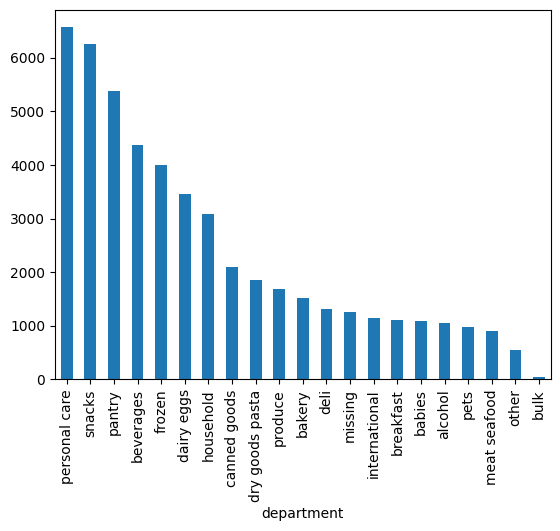

In [14]:
# Distribution of the products per department
product_grouped = products.groupby(['department_id'], as_index=False).agg(count = ('product_id','count'))
product_grouped = product_grouped.join(departments.set_index('department_id'), on = 'department_id')
product_grouped.set_index('department')['count'].sort_values(ascending = False).plot(kind = 'bar')

### order_products 

Columns
- order_id : unique id
- product_id
- add_to_cart_order : order of the product_id added to the cart by the customer for a given order_id
- reordered : Was the product ordered before?

In [15]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [16]:
# Which products are frequently reordered?
reorders = order_products.groupby(['product_id'], as_index=False)\
                    .agg(total = ('reordered','count'), reordered = ('reordered','sum')) \
                    .merge(products, on = 'product_id', how = 'left')\
                    .set_index('product_name')[['total','reordered']]

reorders['ordered_once'] = reorders['total']-reorders['reordered']
reorders['perc'] = reorders['reordered'] / reorders['total']*100
reorders_30 = reorders.loc[reorders['reordered'] != 0].sort_values(by = 'total', ascending = False).head(30)


In [17]:
reorders_30.reset_index().head(10)

,product_name,total,reordered,ordered_once,perc
0,Banana,472565,398609,73956,84
1,Bag of Organic Bananas,379450,315913,63537,83
2,Organic Strawberries,264683,205845,58838,78
3,Organic Baby Spinach,241921,186884,55037,77
4,Organic Hass Avocado,213584,170131,43453,80
5,Organic Avocado,176815,134044,42771,76
6,Large Lemon,152657,106255,46402,70
7,Strawberries,142951,99802,43149,70
8,Limes,140627,95768,44859,68
9,Organic Whole Milk,137905,114510,23395,83


<AxesSubplot:title={'center':'Top 30 reordered products'}, xlabel='product_name'>

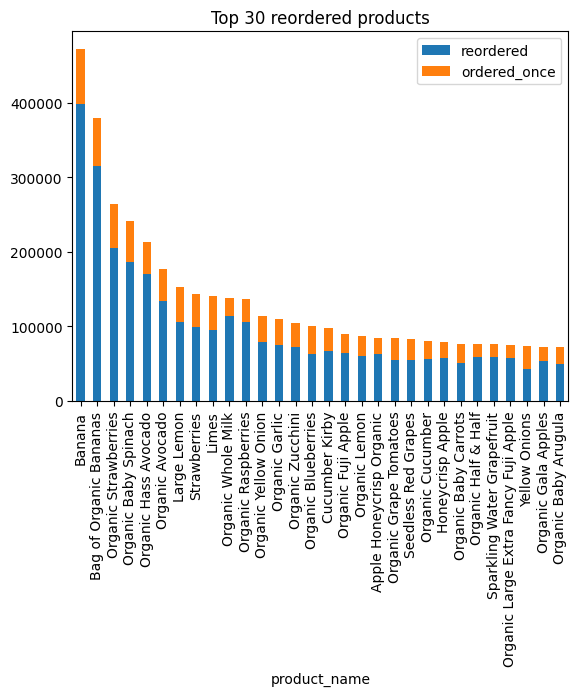

In [18]:
reorders_30.reset_index()[['product_name','reordered','ordered_once']].plot(x = 'product_name', kind = 'bar', stacked = True, title = "Top 30 reordered products")

Most of reordered products are fresh produces 

# 2. Data merge

Merge tables into one table to use for analysis

In [19]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [20]:
# Omitting aisles and departments for now as they contain labels of data
transactions = order_products.merge(orders, on = 'order_id', how = 'left')
transactions = transactions.merge(products.drop(columns = 'product_name'), on = 'product_id', how = 'left')
transactions.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8,86,16
1,2,28985,2,1,202279,prior,3,5,9,8,83,4
2,2,9327,3,0,202279,prior,3,5,9,8,104,13
3,2,45918,4,1,202279,prior,3,5,9,8,19,13
4,2,30035,5,0,202279,prior,3,5,9,8,17,13


In [21]:
# Delete orders with no details
transactions.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
aisle_id                        0
department_id                   0
dtype: int64

In [22]:
# Before looking at order combination, examine orders with a single product

# Identifying purchases with only one item
order_product = transactions.groupby(['order_id']).agg(product_count = ('product_id','count'))
transactions = transactions.merge(order_product, on = 'order_id', how = 'left')

transactions_single = transactions.loc[transactions['product_count'] == 1]
transactions_multiple = transactions.loc[transactions['product_count'] > 1]

transactions.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,product_count
0,2,33120,1,1,202279,prior,3,5,9,8,86,16,9
1,2,28985,2,1,202279,prior,3,5,9,8,83,4,9
2,2,9327,3,0,202279,prior,3,5,9,8,104,13,9
3,2,45918,4,1,202279,prior,3,5,9,8,19,13,9
4,2,30035,5,0,202279,prior,3,5,9,8,17,13,9


In [23]:
# Top 20 single-purchased products

pd.DataFrame(transactions_single.product_id).merge(products[['product_id','product_name']], on = 'product_id', how = 'left').product_name.value_counts().head(20)

Bag of Organic Bananas             2774
Soda                               2604
Spring Water                       2065
Banana                             2047
Organic Baby Spinach               1166
Organic Strawberries               1120
Strawberries                       1018
Clementines                         988
Organic Whole Milk                  988
Smartwater                          938
Hass Avocados                       918
Organic Half & Half                 917
Sparkling Mineral Water             878
Sparkling Water                     865
Natural Spring Water                856
Drinking Water                      820
0% Greek Strained Yogurt            803
Raspberries                         717
Organic Hass Avocado                697
Sparkling Natural Mineral Water     686
Name: product_name, dtype: int64

# 3. Market Basket Analysis 

Market Basket Analysis refers to a type of affinity analysis, which is a data mining method for discovering meaningful co-occurences between different entities in a data set. In the context of Market Basket Analysis, the focus is on analyzing products that are commonly purchased together. By examining the correlation between the products, businesses can seek to optimize product placement, design more effective cross-selling strategies, or offer more impactful product suggestions. 

The likelihood of co-occurences of purchases are uncovered by using association rules. Apriori algorithm is one of the most popular methods for mining the association rules in a dataset.  


## 3.1. Data preparation

In [24]:
purchases = transactions_multiple[['order_id','product_id','aisle_id','order_hour_of_day']].merge(products[['product_id','product_name']], on = 'product_id', how = 'left')
purchases.head()

,order_id,product_id,aisle_id,order_hour_of_day,product_name
0,2,33120,86,9,Organic Egg Whites
1,2,28985,83,9,Michigan Organic Kale
2,2,9327,104,9,Garlic Powder
3,2,45918,19,9,Coconut Butter
4,2,30035,17,9,Natural Sweetener


In [25]:
# Using groups of purchases with product names for easier identification
product_list = (purchases.groupby(['order_hour_of_day','order_id'])['product_name']
                         .agg(lambda x: list(x))
                         .reset_index()
                         .rename(columns={'product_name':'purchase_list'})
                         .dropna())
product_list.head()

,order_hour_of_day,order_id,purchase_list
0,0,30,"[Synergy Organic Kombucha Gingerberry, Mango C..."
1,0,47,"[Strawberries, Organic Blueberries, Raspberrie..."
2,0,48,"[Organic Chicken Bone Broth, Yo Baby Organic W..."
3,0,361,"[Green Peas, Frozen Broccoli Florets, Garlic, ..."
4,0,445,"[Raw Shrimp, Fresh Cut Butternut Squash]"


In [26]:
# Converting series into nested list
def series_to_list(df):
    rules = df.purchase_list.tolist()
    for i in range(len(rules)):
        rules[i] = list(map(str,rules[i]))
    return rules

rules_product = series_to_list(product_list)

print(f'Total number of purchase groups : {len(rules_product)}')
rules_product[:3]

Total number of purchase groups : 3058126


[['Synergy Organic Kombucha Gingerberry',
  'Mango Chunks',
  'Organic Unsweetened Soy Milk Beverage'],
 ['Strawberries',
  'Organic Blueberries',
  'Raspberries',
  'Beef Franks',
  'Golden Pineapple'],
 ['Organic Chicken Bone Broth',
  'Yo Baby Organic Whole Milk Banana Mango Yogurt',
  'YoKids Squeezers Organic Low-Fat Yogurt, Strawberry',
  'Low Sodium Beef Broth',
  'Organic Unrefined Toasted Sesame Oil',
  'Gluten-Free Chicken Nuggets',
  'Original Barbeque Sauce',
  'Milk, Vitamin D']]

## 3.2. Apriori performance comparison

In [27]:
# Running performance test with 1% of dataset
rules_product_test = rules_product[:int(len(rules_product)*0.01)]
len(rules_product_test)

30581

In [28]:
import datetime

results = {}

### 3.2.1. mlxtend

In [29]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

start_time = datetime.datetime.now()
# Data formatting
te = TransactionEncoder()
te_ary = te.fit(rules_product_test).transform(rules_product_test)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Running apriori
apriori(df, min_support=0.6)
end_time = datetime.datetime.now()

results['mlxtend'] = (end_time - start_time).microseconds

### 3.2.2. efficient-apriori

In [30]:
from efficient_apriori import apriori
start_time = datetime.datetime.now()
itemsets, rules = apriori(rules_product_test, min_support=0.6)
end_time = datetime.datetime.now()

results['efficient_apriori'] = (end_time - start_time).microseconds

### 3.2.3. pyFIM

In [31]:
from fim import arules
start_time = datetime.datetime.now()
result = arules(rules_product_test, supp=0.6)
end_time = datetime.datetime.now()

results['pyFIM'] = (end_time - start_time).microseconds

In [33]:
results_time = pd.DataFrame(results.values(), index = results.keys(), columns = ['time_microseconds'])
results_time

,time_microseconds
mlxtend,671767
efficient_apriori,111607
pyFIM,35506


In [34]:
print(f"Based on Market Basket Analysis on 1% of the dataset, pyFIM is {round(results['mlxtend']/results['pyFIM'],2)}x faster than mlxtend, and {round(results['efficient_apriori']/results['pyFIM'],2)}x faster than efficient_apriori")

Based on Market Basket Analysis on 1% of the dataset, pyFIM is 18.92x faster than mlxtend, and 3.14x faster than efficient_apriori


## 3.3. Analysis on the whole dataset

Continuing with pyFIM to conduct Market Basket Analysis. Support and confidence are two key metrics in identifying co-occurence of items.  
- Support : how frequently a set of items appears in the dataset. 
- Confidence : how often consequent items appear in transactions that contain antecedent items. 

For example, when {Eggs, Flour} set has a support of 10% and confidence of 50% for {Eggs} -> {Flour}, the set appears in 10% of the purchases, with 50% of purchases with Eggs also contain Flour. 

In [58]:
supp = 0.01 # minimum support of an assoc. rule   (default: 10)
conf = 50 # minimum confidence of an assoc. rule (default: 80%)
report = 'aSC'
algo = 'ap' # 'fp' or 'ap'

In [60]:
# make dict for nicer looking column names
report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'support_emptyset',
    }

result = arules(rules_product, supp=supp, conf=conf, report=report, zmin=2)

In [61]:
 # make results into dataframe
colnames = ['consequent', 'antecedent'] + [report_colnames.get(k, k) for k in list(report)]
df_result = pd.DataFrame(result, columns=colnames)
df_result = df_result.sort_values('support_itemset_absolute', ascending=False)
print(df_result.shape)

(5619, 5)


In [64]:
df_result['support_itemset_relative_pct'] =  df_result['support_itemset_relative_pct'].map('{:,.5f}'.format)

In [ ]:
# Show 50 frequent purchase combinations
df_result.head(30)

,consequent,antecedent,support_itemset_absolute,support_itemset_relative_pct,confidence_pct
1293,Sparkling Water Grapefruit,"(Sparkling Lemon Water, Lime Sparkling Water)",4434,0.14499,52
1676,Total 2% with Strawberry Lowfat Greek Strained...,(Total 2% Lowfat Greek Strained Yogurt with Pe...,3733,0.12207,59
1996,Icelandic Style Skyr Blueberry Non-fat Yogurt,"(Non Fat Raspberry Yogurt, Vanilla Skyr Nonfat...",2928,0.09574,57
1866,Sparkling Water Grapefruit,"(Peach Pear Flavored Sparkling Water, Lime Spa...",2734,0.08940,65
4188,Almond Milk Strawberry Yogurt,"(Almond Milk Blueberry Yogurt,)",2702,0.08835,57
2030,Sparkling Water Grapefruit,"(Sparkling Water Berry, Lime Sparkling Water)",2658,0.08692,63
4173,Almond Milk Strawberry Yogurt,"(Almond Milk Peach Yogurt,)",2477,0.08100,53
1558,Total 2% with Strawberry Lowfat Greek Strained...,(Total 2% Lowfat Greek Strained Yogurt With Bl...,2405,0.07864,61
1392,Sparkling Water Grapefruit,"(Pure Sparkling Water, Lime Sparkling Water)",2361,0.07720,59
1147,Banana,"(Bartlett Pears, Organic Fuji Apple)",2298,0.07514,54


## 3.4. Deciding on the parameter

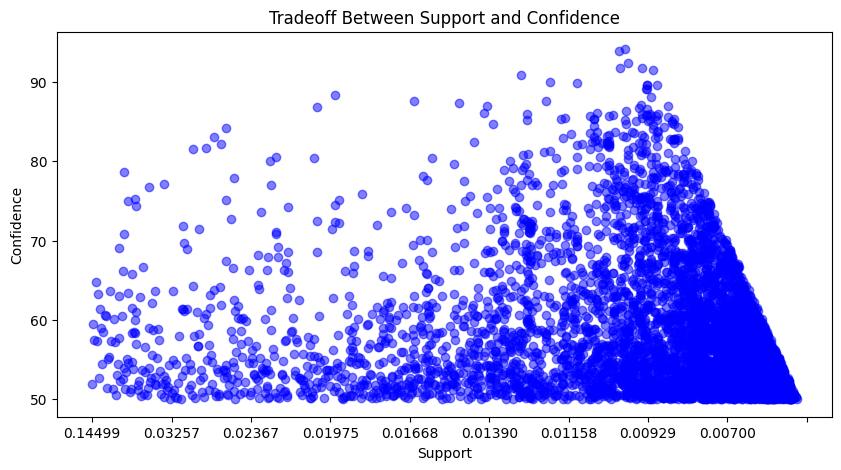

In [ ]:
import numpy as np


# Extracting the support and confidence
support = df_result['support_itemset_relative_pct']
confidence = df_result['confidence_pct']

# Creating the plot
plt.figure(figsize=(10, 5))
plt.scatter(support, confidence, color='blue', alpha=0.5)  # Scatter plot

plt.title('Tradeoff Between Support and Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.xticks(np.arange(0, 700, step=70))


# Show the plot
plt.show()



# Draw a box